## Outline
### Graphical EDA
  - Histogram
  - Bee swarn plot
  - Emperical Cumulative Distribution Functions (ECDF)
  
### Quantitative EDA   
 - Sample mean and median
 - Percentiles
 - Boxplot
 - Variance and standard deviation
 - Covariance and the pearson correlation coefficient
 - Scatterplot

# Graphical Exploratory data analysis (EDA)

### Import Iris data

In [2]:
# imports libraries
import numpy as np # multi-dimensional calculations
import pandas as pd # data frame
import matplotlib.pyplot as plt # visualization tool
import seaborn as sns # visualization tool

In [3]:
#import data
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
# iris features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# check the data size
iris.data.shape

(150, 4)

In [7]:
# data dictoinary of features
data_dict = dict(zip(iris.feature_names,iris.data.T))

## Histogram
Plot a histogram of the petal lenths of the Iris dataset

The histogram using sns.set() default setting had ten bins. This is the default of matplotlib. 
The **"square root rule"** is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. 

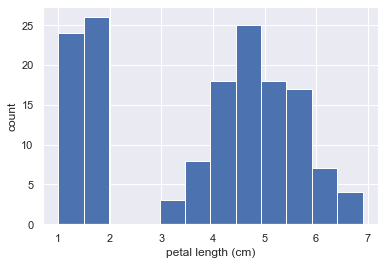

In [6]:
# set data
feature = 'petal length (cm)'
my_feature = data_dict[feature]

# Set default Seaborn style
sns.set()

# Histogram
n_bins = int(np.sqrt(len(my_feature))) # n_bins is sqrt of sample size
plt.hist(my_feature,bins = n_bins)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

**"binning bias":** the visualization can look very different based on our choise of bins. We can use the **bee swarm plot** instead to show the data more accurately.

## Bee swarm plot

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

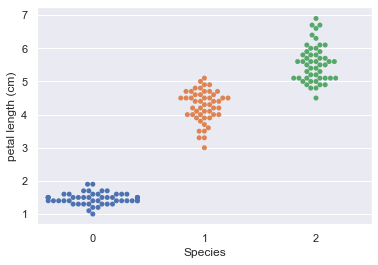

In [8]:
# swarm plot
sns.swarmplot(x = iris.target, y = my_feature)

# Label the axes
plt.xlabel('Species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

Limit:  
Swarm plot is not the best option when we plot a larger amount of data, e.g. all of our data - many overlapping points. Obfuscating data. 
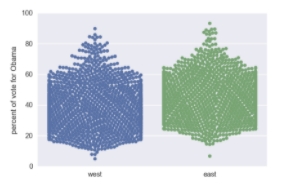
**Emperical Cumulative Distribution Functions (ECDF)**. I think this is always a good way to start getting a sense of your data.


## Emperical Cumulative Distribution Functions (ECDF).

ecdf(): The x values are the sorted data. Use the np.sort() function to perform the sorting.
The  data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.

In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    # The  data of the ECDF go from 1/n to 1 in equally spaced increments.
    y = np.arange(1,len(data)+1)/len(data)

    return x, y

In [10]:
# prepare the data
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris_target = np.reshape(iris.target, (150,1))

In [12]:
iris_data_target = np.append(iris.data, iris_target, axis = 1)

In [13]:
# get the data
setosa_petal_length = iris_data_target[iris_data_target[:,-1] == 0][:,2]
versicolor_petal_length = iris_data_target[iris_data_target[:,-1] == 1][:,2]
virginica_petal_length = iris_data_target[iris_data_target[:,-1] == 2][:,2]

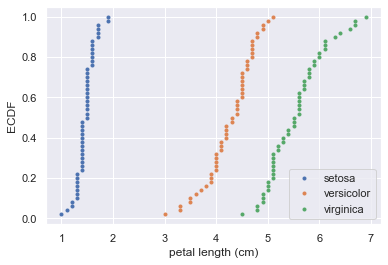

In [14]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers,y_vers = ecdf(versicolor_petal_length)
x_virg,y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.plot(x_set,y_set, marker = '.', linestyle = 'none')
plt.plot(x_vers,y_vers, marker = '.', linestyle = 'none')
plt.plot(x_virg,y_virg, marker = '.', linestyle = 'none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


# Quantitative EDA

## summary statistics - sample mean & median

mean is heavily influenced by outliers. 

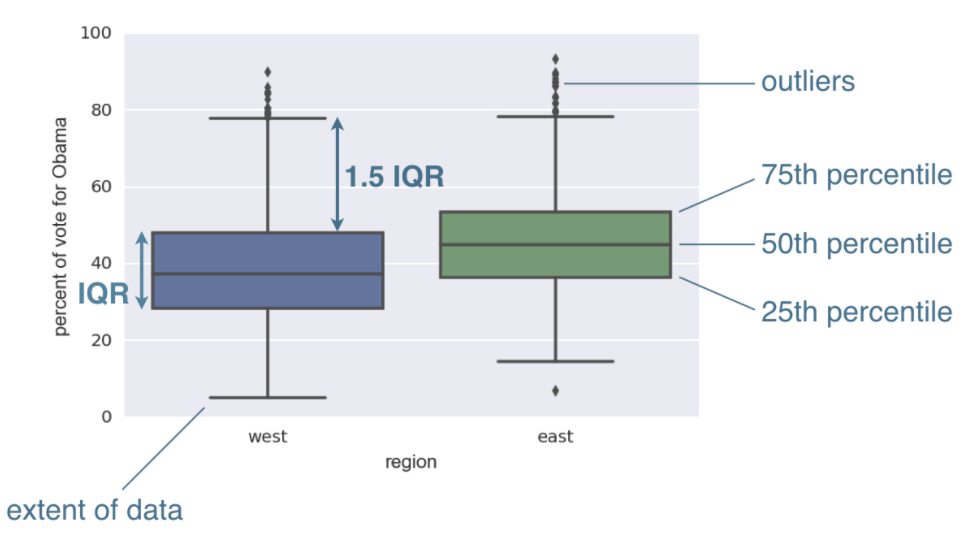
Interquartile range (IQR) = 75th - 25th  
Common rule of thumb for outlier: > 2 IQR from the median.  
However, outliers statistically do not mean they are erroneous.

In [15]:
np.mean(my_feature)
np.percentile(my_feature, [25,50,75])

array([1.6 , 4.35, 5.1 ])

In [16]:
# get the data
setosa_petal_length = iris_data_target[iris_data_target[:,-1] == 0][:,2]
versicolor_petal_length = iris_data_target[iris_data_target[:,-1] == 1][:,2]
virginica_petal_length = iris_data_target[iris_data_target[:,-1] == 2][:,2]

In [17]:
# put all data we wanted to a data frame
petal_length_by_flower = np.append((np.append(np.reshape(setosa_petal_length, (len(setosa_petal_length),1))
                        , np.reshape(versicolor_petal_length, (len(versicolor_petal_length),1))
                                   , axis = 1))
                         , np.reshape(virginica_petal_length, (len(virginica_petal_length),1))
                         , axis = 1)

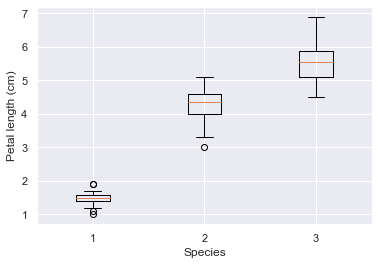

In [18]:
# Boxplot
plt.boxplot(petal_length_by_flower)

# name the plot
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')
plt.show()

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
np.append(iris.feature_names, iris.target_names)

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'setosa', 'versicolor', 'virginica'],
      dtype='<U17')

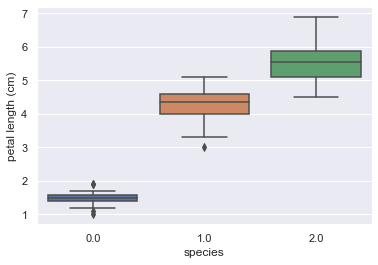

In [23]:
# use seaborn

# make data into dataframe
df = pd.DataFrame(iris_data_target
                 , columns = np.append(iris.feature_names, 'species'))

# Plot boxplot
sns.boxplot('species', 'petal length (cm)',data=df)
plt.show()

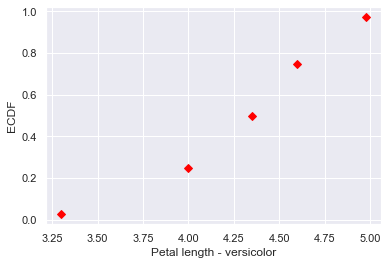

In [24]:
# Plot the percentils of a single species' petal length

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Plot percentiles
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',linestyle = 'none')

# Annotation
plt.ylabel('ECDF')
plt.xlabel('Petal length - versicolor')
plt.show()

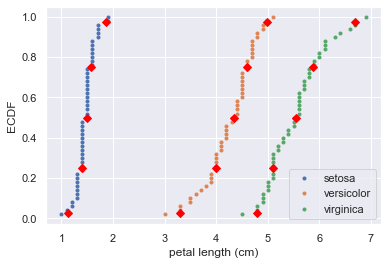

In [25]:
# Overlay the ECDF with percentile

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers,y_vers = ecdf(versicolor_petal_length)
x_virg,y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.plot(x_set,y_set, marker = '.', linestyle = 'none')
plt.plot(x_vers,y_vers, marker = '.', linestyle = 'none')
plt.plot(x_virg,y_virg, marker = '.', linestyle = 'none')

# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)
ptiles_setosa = np.percentile(setosa_petal_length,percentiles)
ptiles_va = np.percentile(virginica_petal_length,percentiles)

# Plot percentiles
    # need to fit the percentile into 0-1, so we divide it by 100
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',linestyle = 'none')
plt.plot(ptiles_setosa, percentiles/100, marker='D', color='red',linestyle = 'none')
plt.plot(ptiles_va, percentiles/100, marker='D', color='red',linestyle = 'none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

## Variance and Std dev

Variance = the mean squared distance of the data from their mean  
 a measure of the spread of data
 
$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}$
we square the distance from the mean, and then take average of all of thse values.  

std dev = squared root of the variance

In [26]:
np.var(ptiles_vers)

0.325331

In [27]:
np.std(ptiles_vers), np.sqrt(np.var(ptiles_vers))

(0.5703779448751503, 0.5703779448751503)

## Covariance and the pearson correlation coefficient

We need a number that summarizes how x varies with y.  

$covariance = 1/n\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$

covariance: mean of the product of the differences (a data point's distance from two means of two variables)   
how to understand: if x & y both tend to be above, or both below their respective means *together*, then the covariance is positive.  

If we want to have a more generally applicable measure of how 2 variables depend on each other, we want it to be **dimensionless**, that is to not have any units.  
$\rho=Pearson correlation=\frac{\text{covariance}}{\text{(std of x)(std of y)}}$  
$=\frac{\text{variability due to codependence}}{\text{independant variability}}$

ranges from -1 to 1. 0 means no correlation at all.

Use case  
Previously, we visualize th differences between one property (petal length) of different species. Now how to compare two properties of a single species? This is when covariance and scatter plot come in handy.

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


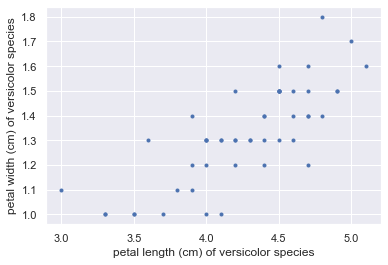

In [35]:
# make a scatter plot
plt.plot(df[(df.species==1)]['petal length (cm)'],
        df[(df.species==1)]['petal width (cm)'],
        marker = '.',
        linestyle = 'none')

# annotation
plt.xlabel('petal length (cm) of versicolor species')
plt.ylabel('petal width (cm) of versicolor species')

plt.show()

In [38]:
# calculate covariance
cov = np.cov(df[(df.species==1)]['petal length (cm)'],
        df[(df.species==1)]['petal width (cm)'])
cov, cov[0,1]

(array([[0.22081633, 0.07310204],
        [0.07310204, 0.03910612]]), 0.07310204081632653)

For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [39]:
# calculate Pearson correlation coefficient
pearson_cov = np.corrcoef(df[(df.species==1)]['petal length (cm)'],
        df[(df.species==1)]['petal width (cm)'])
pearson_cov, pearson_cov[0,1]

(array([[1.        , 0.78666809],
        [0.78666809, 1.        ]]), 0.7866680885228169)

it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1, and the value we are after is entry [0,1]